# **Movie Recommendation System (Collaborative Filtering Based)**

### 1. Loading all necessary libraries and modules

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Loading Required Dataset

In [ ]:
movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/movies.csv')
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/ratings.csv')

Rough Work

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
movies1 = movies.dropna(subset=['genres'])

In [ ]:
movies1.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# top 10 high rating movies without ratings
top_rated_movies = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
print(top_rated_movies)

movieId
95517     5.0
105846    5.0
89133     5.0
105187    5.0
105191    5.0
88488     5.0
126945    5.0
105526    5.0
105529    5.0
105841    5.0
Name: rating, dtype: float64


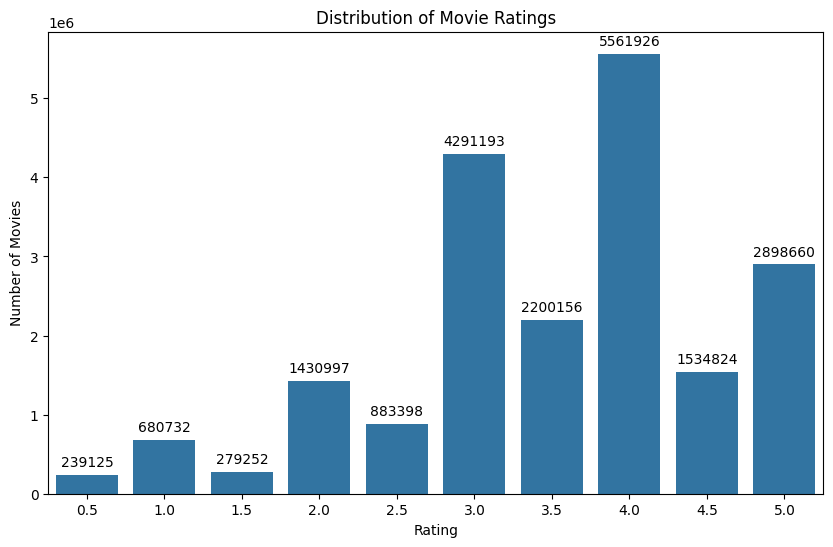

In [ ]:
# Count the number of movies for each rating
movie_counts = ratings['rating'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=movie_counts.index, y=movie_counts.values)

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

# Add the count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


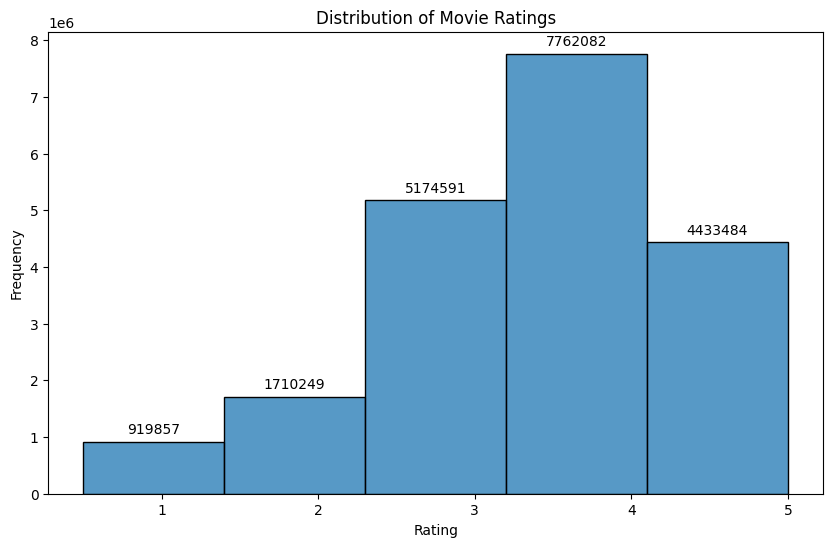

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(ratings['rating'], bins=5, kde=False)

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add frequency count on top of each bin
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()


In [ ]:
mergedDF= ratings.merge(movies,on='movieId')
mergedDF

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
20000258,138301,121017,3.5,1420558479,The Gentleman from Epsom (1962),Comedy|Crime
20000259,138301,121019,4.5,1420558606,The Great Spy Chase (1964),Action|Comedy|Thriller
20000260,138301,121021,4.5,1420558687,Taxi for Tobruk (1961),Drama|War
20000261,138406,110167,4.5,1396184127,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama


In [ ]:
print(mergedDF.shape)

(20000263, 6)


In [ ]:
print(ratings.describe())
print(ratings.isnull().sum())
print(ratings.shape)

             userId       movieId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00  1.100918e+09
std    4.003863e+04  1.978948e+04  1.051989e+00  1.621694e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    3.439500e+04  9.020000e+02  3.000000e+00  9.667977e+08
50%    6.914100e+04  2.167000e+03  3.500000e+00  1.103556e+09
75%    1.036370e+05  4.770000e+03  4.000000e+00  1.225642e+09
max    1.384930e+05  1.312620e+05  5.000000e+00  1.427784e+09
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
(20000263, 4)


In [ ]:
# EDA part
'''sns.histplot(ratingss['rating'], bins=range(0, 6, 1))
plt.show()'''


In [ ]:
# EDA part
'''# Correlation Heatmap
sns.heatmap(ratingss.corr(), annot=True, cmap='coolwarm')
plt.show()'''

In [ ]:
# No. of unique users and movies.
print("Number of unique users:", ratings['userId'].nunique())
print("Number of unique movies:", ratings['movieId'].nunique())

In [ ]:
# User rating count
'''user_counts = pd.DataFrame(ratings['userId'].value_counts())'''
user_counts = pd.DataFrame(ratings['userId'].value_counts(), columns=['userId', 'count'])

user_counts=user_counts.sort_index()

user_counts['userId']= user_counts.index

user_counts['userId']= user_counts.index
user_counts.head()

,userId,count
userId,,
1,1,175
2,2,61
3,3,187
4,4,28
5,5,66


In [ ]:
active_users = user_counts[user_counts['count'] >= 155]
print(active_users)

        userId  count
userId               
1            1    175
3            3    187
7            7    276
11          11    504
14          14    243
...        ...    ...
138474  138474    594
138477  138477    224
138483  138483    276
138486  138486    193
138493  138493    373

[34640 rows x 2 columns]


In [ ]:
user_counts.describe()

,userId,count
count,138493.000000,138493.000000
mean,69247.000000,144.413530
std,39979.629753,230.267257
min,1.000000,20.000000
25%,34624.000000,35.000000
50%,69247.000000,68.000000
75%,103870.000000,155.000000
max,138493.000000,9254.000000


In [ ]:
'''# Visualize the rating distribution by user (using a histogram
user_hist = ratingss['userId'].value_counts().sort_index()
user_hist.plot(kind='bar')
plt.title('User Rating Distribution')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()'''

In [ ]:
# No. of Ratings on movie
movie_counts = pd.DataFrame(ratings['movieId'].value_counts())
# print(movie_counts)
movie_counts.describe()

,count
count,26744.000000
mean,747.841123
std,3085.818268
min,1.000000
25%,3.000000
50%,18.000000
75%,205.000000
max,67310.000000


In [ ]:
movie_counts = pd.DataFrame(ratings['movieId'].value_counts(), columns=['movieId', 'count'])

movie_counts = movie_counts.sort_index()

movie_counts['movieId'] = movie_counts.index
movie_counts['movieId'] = movie_counts.index
movie_counts.head()

,movieId,count
movieId,,
1,1,49695
2,2,22243
3,3,12735
4,4,2756
5,5,12161


In [ ]:
movie_counts.describe()

,movieId,count
count,26744.000000,26744.000000
mean,58789.612436,747.841123
std,44159.344871,3085.818268
min,1.000000,1.000000
25%,6795.750000,3.000000
50%,65880.000000,18.000000
75%,99110.500000,205.000000
max,131262.000000,67310.000000


### 3. Preprocessing of the data

In [ ]:
x = mergedDF.groupby('userId').count()['rating'] > 155
trusted_users = x[x].index
print(trusted_users)

Index([     1,      3,      7,     11,     14,     21,     24,     29,     31,
           35,
       ...
       138457, 138459, 138464, 138467, 138472, 138474, 138477, 138483, 138486,
       138493],
      dtype='int64', name='userId', length=34395)


In [ ]:
filtered_rating = mergedDF[mergedDF['userId'].isin(trusted_users)]
print(filtered_rating.shape)

(13800617, 6)


In [ ]:
y = filtered_rating.groupby('title').count()['rating']>=205
liked_movies = y[y].index
#liked_movies

In [ ]:
final_ratings = filtered_rating[filtered_rating['title'].isin(liked_movies)]
#final_ratings

In [ ]:
# Pivot table formation
pt = final_ratings.pivot_table(index='title',columns='userId',values='rating')
pt.fillna(0,inplace=True)
pt

userId,1,3,7,11,14,21,24,29,31,35,...,138457,138459,138464,138467,138472,138474,138477,138483,138486,138493
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
*batteries not included (1987),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC] (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# for exporting excel file of top movies
'''import pandas as pd
from pathlib import Path
#df = pd.DataFrame(pt.index, columns=['movie'])
#df = pd.DataFrame(movie_names, columns=['movie'])
nk=list(pt.index)
df = pd.DataFrame(nk, columns=['movie'])
excel_path = Path('/content/drive/My Drive/Colab Notebooks/moviess.xlsx')
df.to_excel(excel_path)
print(df)'''

### Finding Similarity Score

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.06760903, 0.06741865, ..., 0.0408618 , 0.02931124,
        0.06879121],
       [0.06760903, 1.        , 0.06854946, ..., 0.13420916, 0.04989914,
        0.34911932],
       [0.06741865, 0.06854946, 1.        , ..., 0.01832325, 0.00354655,
        0.06282294],
       ...,
       [0.0408618 , 0.13420916, 0.01832325, ..., 1.        , 0.32818891,
        0.19192958],
       [0.02931124, 0.04989914, 0.00354655, ..., 0.32818891, 1.        ,
        0.07005095],
       [0.06879121, 0.34911932, 0.06282294, ..., 0.19192958, 0.07005095,
        1.        ]])

In [ ]:
similarity_scores.shape
# Heatmap of similarity matrix
# Assuming pt is your similarity matrix
'''
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(similarity_scores, annot=True, cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Similarity Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()
'''

'\nplt.figure(figsize=(10, 8))  # Set the figure size\nsns.heatmap(similarity_scores, annot=True, cmap="coolwarm", linewidths=0.5, square=True)\nplt.title("Similarity Matrix Heatmap")\nplt.xlabel("Features")\nplt.ylabel("Features")\nplt.show()\n'

In [ ]:

# EDA by ----NANCY
'''
import pandas as pd

top10_movies = sorted(list(enumerate(max_scores)), reverse=True)[:10]

movies = pd.DataFrame(columns=range(1,12))

for i, score in top10_movies:

  movie = pt.index[i]

  similar_movies = sorted(list(enumerate(similarity_scores[i])), key=lambda x:x[1], reverse=True)[1:11]

  row = [movie]
  row.extend([pt.index[item[0]] for item in similar_movies[:10]])

  movies.loc[movie] = row

import seaborn as sns

# Get top 5 movies
top5_movies = movies.head()
top5_movies = top5_movies.set_index('movie')
print(top5_movies.columns)
# Melt pivot table to long format
melted = top5_movies.reset_index().melt(id_vars='movie')

# Plot heatmap
g = sns.heatmap(top5_movies,
                 annot=True,
                 fmt=".2f",
                 cmap="RdBu",
                 linewidths=.5,
                 linecolor='white',
                 square=True)

# Rotate x-tick labels
g.set_xticklabels(g.get_xticklabels(),
                   rotation=90,
                   fontsize=8)

# Show heatmap
plt.show()'''

In [ ]:
# EDA by NANCY

'''import seaborn as sns

# Get top 5 movies
top5_movies = movies.head()

# Melt pivot table to long format
melted = top5_movies.reset_index().melt(id_vars='movie')

# Plot heatmap
g = sns.heatmap(top5_movies,
                 annot=True,
                 fmt=".2f",
                 cmap="RdBu",
                 linewidths=.5,
                 linecolor='white',
                 square=True)

# Rotate x-tick labels
g.set_xticklabels(g.get_xticklabels(),
                   rotation=90,
                   fontsize=8)

# Show heatmap
plt.show()'''

In [ ]:
def recommend(movie_name):

  # Check if movie is in index
  if movie_name in pt.index:

    index = np.where(pt.index==movie_name)[0][0]

    similar_items = sorted(list(enumerate(similarity_scores[index])),
                          key=lambda x:x[1], reverse=True)[1:6]

    data = []

    for i in similar_items:

      similar_movie = pt.index[i[0]]

      # Get movie details from movies DataFrame
      movie = mergedDF[mergedDF['title'] == similar_movie]

      item = {
        'title': movie['title'].values[0],
        'genres': movie['genres'].values[0]
      }

      data.append(item)

    return data

  else:
    print(f"Movie {movie_name} not found in index")
    return None

In [ ]:
#print(movies.columns)
recommend("Win Win (2011)")
#recommend("Transcendence (2014)")

[{'title': 'Descendants, The (2011)', 'genres': 'Comedy|Drama'},
 {'title': '50/50 (2011)', 'genres': 'Comedy|Drama'},
 {'title': 'Moneyball (2011)', 'genres': 'Drama'},
 {'title': 'Midnight in Paris (2011)', 'genres': 'Comedy|Fantasy|Romance'},
 {'title': 'Ides of March, The (2011)', 'genres': 'Drama'}]

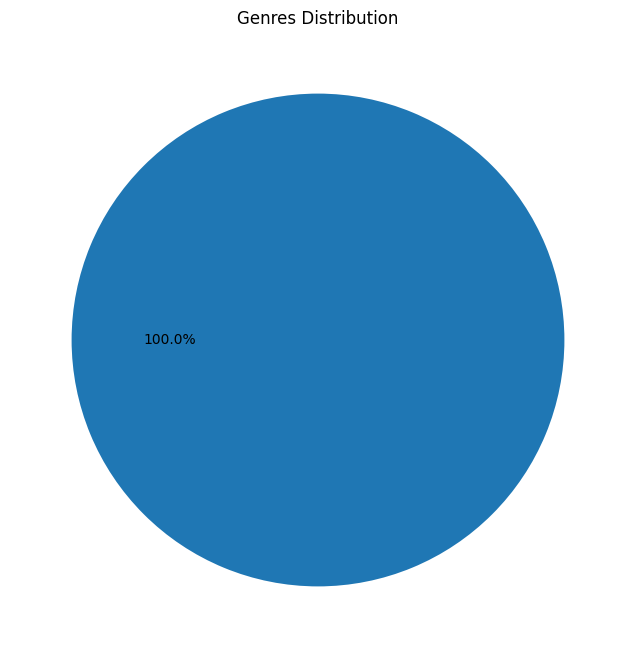

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called df_title_basics
genres = movies['genres'].fillna('').str.split('|').explode()

# Get the count of each genre
genre_counts = genres.value_counts()

# Plot the pie chart
plt.figure(figsize=(10,8))
plt.pie(genre_counts, labels = genre_counts.index, autopct='%1.1f%%')
plt.title('Genres Distribution')
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'movies' DataFrame is already loaded and processed

# Split the 'genres' column into separate genres
movies['genres'] = movies['genres'].str.split('|')

# Create a list to store all genres
all_genres = []

# Iterate over each row and append genres to the list
for genres in movies['genres']:
    if isinstance(genres, list):
        all_genres.extend(genres)

# Convert the list to a Series
genres_series = pd.Series(all_genres)

# Check if there are any genres
if not genres_series.empty:
    # Count the occurrences of each genre
    genre_counts = genres_series.value_counts()

    # Identify the top 10 genres
    top_10_genres = genre_counts.nlargest(10)

    # Sum the counts of the remaining genres
    other_genres_count = genre_counts[10:].sum()

    # Combine the top 10 genres with "Others"
    genre_counts_combined = top_10_genres.append(pd.Series({'Others': other_genres_count}))

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(genre_counts_combined, labels=genre_counts_combined.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Movie Genres')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()
else:
    print("No valid genres found.")

AttributeError: Can only use .str accessor with string values!